<div class="alert alert-block alert-info">
This script <b> regroupes the CPC 33 to 36 divisions data into 3 categories</b>.
    <hr> 
    Note: <br>
    <i><b>Input file(s)' name(s) and metadata</b></i> (if available) are <b>printed out (below 👇🏼) in 'read data to df' section.</b>

In [1]:
# %env
# %who_ls
# %who
# %who int
# %pinfo <var name>

# Imports

In [2]:
%config IPCompleter.use_jedi = False # disable jedi autocompleter (https://stackoverflow.com/a/65734178/14485040)

import project_path  # makes possible the access to `src` directory using relative path
from src.data import internal_funcs
from src.utils import explore_dir, make_readme_info
from src.utils import read_excel_to_pandas as r_excel
from src.utils import set_outputs_dir
from src.utils import write_pandas_to_excel as w_excel

%run init_nb.ipynb

# INPUTS: Identify file(s) and read data to df

In [3]:
# Explore the directory to find the file(s)
inputs_dir, files_list = explore_dir(
    path_to_dir=r"..\data\interim", file_extension="xlsx", print_files_list=True
)

['CPC33to36_other_chemicals.xlsx',
 'data-filtered-cpc-33to36-divisions.xlsx',
 'df_chemproperties.xlsx',
 'extended-data-chosen-methods-metadata-pubchem-properties.xlsx',
 'lcia-results-from-sp910-combined.xlsx',
 'list-chemicals-not-shown-on-fig-prices-vs-impacts.xlsx',
 'list-chemicals-not-shown-on-fig3.xlsx',
 'list-outliers.xlsx',
 'mapped-lcia-results.xlsx',
 'pubchem-properties.xlsx',
 'raw-data-chosen-lcia-methods-and-metadata.xlsx',
 'temp-df_base_full_wCAS.xlsx',
 'temp-df_base_full_wCAS_woOutliersRMDk9a5.xlsx',
 'temp-dict_fullMethods.xlsx',
 'to-check-regrouped-data-other-chemicals-category.xlsx']


In [4]:
# Read data
df_cpc33to36 = r_excel(
    inputs_dir, "data-filtered-cpc-33to36-divisions.xlsx"
)
print(
    "df_cpc33to36".ljust(40, "."),
    f"{df_cpc33to36.shape}\n".rjust(13, "."),
)

# Get list of LCIA methods and list of metadata
METHODS = r_excel(
    inputs_dir,
    "data-filtered-cpc-33to36-divisions.xlsx",
    sheets="METHODS",
    show_readme=False,
)["METHODS"].to_list()

METADATA = r_excel(
    inputs_dir,
    "data-filtered-cpc-33to36-divisions.xlsx",
    sheets="METADATA",
    show_readme=False,
)["METADATA"].to_list()


===> Trying to load 'readme' data... ===
File: data-filtered-cpc-33to36-divisions.xlsx from
C:\Users\ViteksPC\Documents\00-ETH_projects\17-AESA_ecoinvent_chemicals\notebooks\0.30-vt-filter-CPC-categories.ipynb
Generated on 2021-07-30 (Friday), 18:08:07 by Tulus, V.
Includes:
<<<
Sheet1: Filtered dataframe includes any chemicals that belong to CPC divisions 33, 34 , 35 or 36.
METADATA: list of relevant metadata used in Sheet1.
METHODS: list of LCIA methods used in Sheet1.
[METHODS + METADATA have to be the only column labels in Sheet1]
>>>

df_cpc33to36............................ ...(892, 39)



In [5]:
pd.options.display.max_columns = None

# Operations 
<div class="alert alert-block alert-info">
    regroup the <code>category_regrouped</code> column with CPC divisions into 3 categories: <strong>organic, inorganic, other</strong>.
</div>

Updated **df_cpc33to36** dataframe is of (892, 39) shape.

category_regrouped
Organic chemical      441
Other chemical        235
Inorganic chemical    216
dtype: int64
Total:  892

Shares in % for  category_regrouped
Inorganic chemical    24.22
Organic chemical      49.44
Other chemical        26.35
dtype: float64


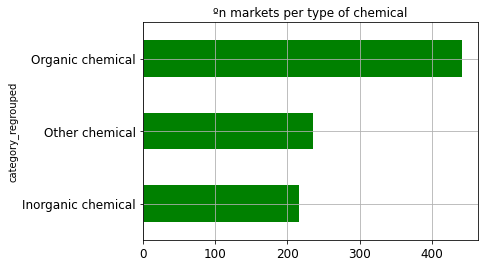

In [6]:
regrouped_cat = []
for item in df_cpc33to36.index:
    if str(df_cpc33to36.referenceProduct_CPCclass[item]).startswith(
        ("331", "332", "333", "334", "335", "341", "343", "347", "352", "36")
    ):
        regrouped_cat.append("Organic chemical")
    elif str(df_cpc33to36.referenceProduct_CPCclass[item]).startswith(
        ("342", "344")
    ):
        regrouped_cat.append("Inorganic chemical")
    else:
        regrouped_cat.append("Other chemical")

try:
    df_cpc33to36.insert(
        1, "category_regrouped", regrouped_cat, allow_duplicates=False
    )
except:
    df_cpc33to36.drop("category_regrouped", axis=1, inplace=True)
    df_cpc33to36.insert(1, "category_regrouped", regrouped_cat)


# (!) update the list of non-method column labels
METADATA = list(filter(lambda a: a != "category_regrouped", METADATA))
METADATA.insert(1, "category_regrouped")
print("Updated **df_cpc33to36** dataframe is of {} shape.\n".format(df_cpc33to36.shape))
df_cpc33to36.sample(2)

internal_funcs.plot_categories(
    df_cpc33to36,
    groupby="category_regrouped",
    cutoff_value=0,
    color="green",
    fontsize=12,
)

In [7]:
# Make df of METADATA and METHODS for later export
df_metadata = pd.DataFrame(METADATA, columns=["METADATA"])
df_methods = pd.DataFrame(METHODS, columns=["METHODS"])

# OUTPUTS: Export data to excel

In [8]:
%%time
# WHAT ARE THE OTHER CHEMICALS? DO THEY BELONG TO ORGANIC OR INORGANIC???
# CHECK LATER!

df_toprint = df_cpc33to36[df_cpc33to36.category_regrouped == "Other chemical"][
    [
        "referenceProduct",
        "MF",
        "category_regrouped",
        "referenceProduct_CPCclass",
        "category",
        "Activity",
    ]
]

outdir = set_outputs_dir(use_default=True) # set to default "..\data\interim"
flname = "to-check-regrouped-data-other-chemicals-category.xlsx"
rdme = make_readme_info(flname, "Chemicals alternatively classifed as 'other'."
            "The chemicals have to be checked and probably moved to organic or inorganic...")
w_excel(
    path_to_file=outdir,
    filename=flname,
    dict_data_to_write={"Sheet1": df_toprint},
    readme_info=('readme', rdme)
)

df_toprint.sample(3)

File: to-check-regrouped-data-other-chemicals-category.xlsx successfully created in 
C:\Users\ViteksPC\Documents\00-ETH_projects\17-AESA_ecoinvent_chemicals\data\interim
Wall time: 144 ms


,referenceProduct,MF,category_regrouped,referenceProduct_CPCclass,category,Activity
883,Solvent for paint,NaN,Other chemical,3511: Paints and varnishes and related products,Chemicals\Others\Market,Solvent for paint {GLO}| market for solvent fo...
179,Benzo[thia]diazole-compound,NaN,Other chemical,"34663: Herbicides, anti-sprouting products and...",Chemicals\Pesticides\Market,Benzo[thia]diazole-compound {GLO}| market for ...
736,Synthetic rubber,NaN,Other chemical,34800: Synthetic rubber and factice derived fr...,Plastics\Rubbers\Market,"Synthetic rubber {GLO}| market for | APOS, S"


In [9]:
%%time

# Set output directory
outputs_dir = set_outputs_dir(use_default=True)  # default `..\data\interim`

## Export dataframe to excel
excelName = "data-regrouped-cpc-divisions-into-3-categories.xlsx"

df_readme = make_readme_info(
    excelName,
    "Sheet1: Dataframe with chemicals from divisions 33-36 is regrouped "
    "into 3 categoreis: 'organic', 'inorganic' or 'other'."
    "[New column 'category_regrouped' is added]"
    "\nMETADATA: list of relevant metadata used in Sheet1."
    "\nMETHODS: list of LCIA methods used in Sheet1."
    "\n[METHODS + METADATA have to be the only column labels in Sheet1]",
)

w_excel(
    path_to_file=outputs_dir,
    filename=excelName,
    dict_data_to_write={
        "Sheet1": df_cpc33to36,
        "METADATA": df_metadata,
        "METHODS": df_methods,
    },
    readme_info=("readme", df_readme),
    #     ExcelWriter_kwargs={"engine": "openpyxl", "encoding": "UTF-8"}
    #     startrow=0
)

File: data-regrouped-cpc-divisions-into-3-categories.xlsx successfully created in 
C:\Users\ViteksPC\Documents\00-ETH_projects\17-AESA_ecoinvent_chemicals\data\interim
Wall time: 1.24 s
